# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from joblib import dump, load
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

## 1. Preprocessing

1. Считайте файл `dayofweek.csv` в датафрейм. 
2. С помощью функции `train_test_split` с параметрами `test_size=0.2`, `random_state=21` получите `X_train`, `y_train`, `X_test`, `y_test`. 
3. С помощью, например, функции `value_counts()` проверьте, одинаково ли распределение классов в обучающей и тестовой выборках. 
4. Используйте дополнительный параметр `stratify=` и снова проверьте распределение. Теперь оно должно быть более или менее одинаковым в обоих наборах данных.

In [76]:
df = pd.read_csv('../data/dayofweek.csv')
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
# Подготовка данных
x = df.drop('dayofweek', axis=1)
y = df['dayofweek']

## Распределение классов на обучающую и тестовую выборку

### Без стратификации

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

print("Обучающая выборка:\n", y_train.value_counts(normalize=True))
print("\nТестовая выборка:\n", y_test.value_counts(normalize=True))

Обучающая выборка:
 dayofweek
3    0.232196
6    0.212908
1    0.164688
5    0.160237
2    0.092730
0    0.077893
4    0.059347
Name: proportion, dtype: float64

Тестовая выборка:
 dayofweek
3    0.245562
6    0.204142
5    0.162722
1    0.153846
0    0.091716
4    0.071006
2    0.071006
Name: proportion, dtype: float64


## Со стратификацией

In [79]:
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(x, y, test_size=0.2, random_state=21, stratify=y)

print("Обучающая выборка:\n", y_train.value_counts(normalize=True))
print("\nТестовая выборка:\n", y_test.value_counts(normalize=True))

Обучающая выборка:
 dayofweek
3    0.232196
6    0.212908
1    0.164688
5    0.160237
2    0.092730
0    0.077893
4    0.059347
Name: proportion, dtype: float64

Тестовая выборка:
 dayofweek
3    0.245562
6    0.204142
5    0.162722
1    0.153846
0    0.091716
4    0.071006
2    0.071006
Name: proportion, dtype: float64


## 2. Baseline models

1. Обучите точно такие же базовые модели, как в предыдущем упражнении, и рассчитайте точность с помощью тестового набора данных со стратификацией.
2. Все ли модели показали схожие значения метрики? Какая из них отличается больше всего по сравнению с предыдущим упражнением? Вставьте ответ в ячейку с разметкой в конце раздела.

### a. Logreg

In [80]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(x_train_st, y_train_st)

y_pred = model.predict(x_test_st)
accuracy_logreg = accuracy_score(y_test_st, y_pred)

print(f"Точность логистической регрессии: {accuracy_logreg}")
print("Точность логистической регрессии в ex02 : 0.6405693950177936")

Точность логистической регрессии: 0.6331360946745562
Точность логистической регрессии в ex02 : 0.6405693950177936


### b. SVM

In [81]:
svc_model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21))
svc_model.fit(x_train_st, y_train_st)

y_pred = svc_model.predict(x_test_st)
accuracy_svc = accuracy_score(y_test_st, y_pred)

print(f"Точность SVC (linear): {accuracy_svc}")
print("Точность SVC (linear) в ex02: 0.6126927639383155")

Точность SVC (linear): 0.6301775147928994
Точность SVC (linear) в ex02: 0.6126927639383155


### c. Decision tree

In [82]:
dt_model = DecisionTreeClassifier(max_depth=4, random_state=21)
dt_model.fit(x_train_st, y_train_st)

y_pred = dt_model.predict(x_test_st)
accuracy_dt = accuracy_score(y_test_st, y_pred)

print(f"Точность DecisionTreeClassifier (max_depth=4): {accuracy_dt}")
print("Точность DecisionTreeClassifier (max_depth=4) в ex02: 0.5516014234875445") 

Точность DecisionTreeClassifier (max_depth=4): 0.5295857988165681
Точность DecisionTreeClassifier (max_depth=4) в ex02: 0.5516014234875445


### d. Random forest

In [83]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rf_model.fit(x_train_st, y_train_st)

y_pred = rf_model.predict(x_test_st)
accuracy_rf = accuracy_score(y_test_st, y_pred)
print(f"Точность RandomForest: {accuracy_rf}")
print("Точность RandomForest в ex02: 1.0")

Точность RandomForest: 0.9289940828402367
Точность RandomForest в ex02: 1.0


## Ответ: Больше всех значения отличаются у Random forest

## 3. Crossvalidation (Перекрёстная проверка)

Мы могли бы поэкспериментировать с параметрами модели, чтобы добиться более высокой точности на тестовом наборе данных, но это плохая практика. Это снова приведёт нас к переобучению. Тестовый набор данных предназначен только для проверки качества итоговой модели.

Но есть и другой способ решения проблемы — перекрёстная проверка. Она не использует тестовый набор данных, а создаёт ещё одно разделение обучающего набора данных. Опять же, есть разные способы сделать это, но суть в том, что для оптимизации гиперпараметров используется проверочный набор данных.

1. С помощью функции `cross_val_score` с параметром `cv=10` рассчитайте среднюю точность и стандартное отклонение для каждой модели, которую вы использовали ранее (logreg с параметром `solver='liblinear'`, SVC, дерево решений, случайный лес).

### a. Logreg

In [84]:
logreg = LogisticRegression(solver='liblinear', random_state=21, fit_intercept=False)
logreg_scores = cross_val_score(logreg, x_train_st, y_train_st, cv=10)

print(f"Средняя точность: {np.mean(logreg_scores)}")
print(f"Стандартное отклонение: {np.std(logreg_scores)}")

Средняя точность: 0.5815975677169707
Стандартное отклонение: 0.025322132907253592


### b. SVM

In [85]:
svc_scores = cross_val_score(svc_model, x_train_st, y_train_st, cv=10)

print(f"Средняя точность: {np.mean(svc_scores)}")
print(f"Стандартное отклонение: {np.std(svc_scores)}")

Средняя точность: 0.5705085682697624
Стандартное отклонение: 0.037010421284044116


### c. Decision tree

In [86]:
dt_scores = cross_val_score(dt_model, x_train_st, y_train_st, cv=10)

print(f"Средняя точность: {np.mean(dt_scores)}")
print(f"Стандартное отклонение: {np.std(dt_scores)}")

Средняя точность: 0.5088944168048645
Стандартное отклонение: 0.031903139495514356


### d. Random forest

In [87]:
rf_scores = cross_val_score(rf_model, x_train_st, y_train_st, cv=10)

print(f"Средняя точность: {np.mean(rf_scores)}")
print(f"Стандартное отклонение: {np.std(rf_scores)}")

Средняя точность: 0.9176561636263129
Стандартное отклонение: 0.02159583796321821


## 4. Optimization

1. Выберите лучшую модель и немного поэкспериментируйте с параметрами при перекрёстной проверке, чтобы найти подходящий параметр или комбинацию параметров.
2. Рассчитайте точность окончательной модели на тестовом наборе данных.
3. Постройте график, на котором будут отображены 10 наиболее важных признаков для этой модели.
4. Сохраните модель с помощью `joblib`.
5. Загрузите модель, сделайте прогнозы для тестового набора данных и рассчитайте точность.

### Лучшая модель — RandomForestClassifier

In [88]:
param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 25, 50, None]
}
rf_model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
grid_search = GridSearchCV(rf_model, param, cv=5, scoring='accuracy')
grid_search.fit(x_train_st, y_train_st)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=25, random_state=21),
             param_grid={'max_depth': [10, 25, 50, None],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [89]:
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность при кросс-валидации:", grid_search.best_score_)

Лучшие параметры: {'max_depth': 25, 'n_estimators': 200}
Лучшая точность при кросс-валидации: 0.9028087567121025


### Точность окончательной модели на тестовом наборе данных

In [90]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test_st)
accuracy_test = accuracy_score(y_test_st, y_pred) #accuracy = (количество верных предсказаний) / (общее количество примеров)
print(f"Точность на тестовом наборе: {accuracy_test}")

Точность на тестовом наборе: 0.9319526627218935


In [91]:
def plot_feature_importance(importance, features, top_n=10, model_name='Model'):
    idx = np.argsort(importance)[-top_n:]
    names = features[idx]
    values = importance[idx]
    
    plt.figure(figsize=(10, 0.5*top_n))
    bars = plt.barh(range(top_n), values, color="#e10ba8", alpha=0.7, edgecolor='black')
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', va='center', fontsize=9)
    
    plt.yticks(range(top_n), names)
    plt.title(f'Top {top_n} Features: {model_name}')
    plt.xlabel('Важность признака')
    plt.grid(axis='x', linestyle=':', alpha=0.5)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.tight_layout()
    plt.show()

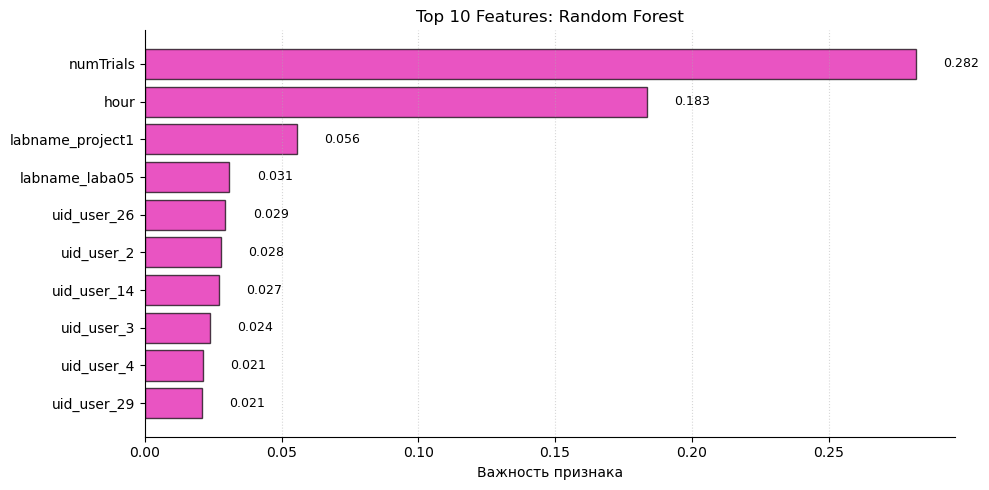

In [92]:
plot_feature_importance(best_rf.feature_importances_, x_train_st.columns, top_n=10, model_name='Random Forest')

In [93]:
dump(best_rf, '../data/best_rfc_model.joblib')

['../data/best_rfc_model.joblib']

In [94]:
loaded_model = load('../data/best_rfc_model.joblib')
y_pred_l = loaded_model.predict(x_test_st)

In [95]:
loaded_accuracy = accuracy_score(y_test_st, y_pred_l)
print(f"Точность загруженной модели: {loaded_accuracy}")
print(f"Точность на тестовом наборе: {accuracy_test}")

Точность загруженной модели: 0.9319526627218935
Точность на тестовом наборе: 0.9319526627218935
